# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #: 12

Names: Bo Xiao Kexiong Wu

# Getting started

In [1]:
# Import the robot class we are developing
import robot

In [2]:
# Make a new leg variable which is a robot.Leg class

leg = robot.Leg()

Connected!
here2


In [3]:
leg.get_joint_pos()

print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

joint0: 0.023193 	 joint1: -0.002120


# Your code below!

In [29]:
import odrive.core
import time
import math

import numpy as np
import matplotlib.pyplot as plt

# For symbolic processing
import sympy
from sympy import symbols
from sympy import sin, cos, asin, acos, pi
from sympy.utilities.lambdify import lambdify
from sympy import Matrix

In [30]:
import pandas as pd
df = pd.read_csv('wkx.csv')
xx, yy = df['xx'], df['yy']
tt = len(xx)


In [31]:
(sim_theta0,sim_theta1, sim_alpha0, sim_alpha1) = leg.move_trajectory(tt, xx, yy)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [17]:
# Define a draw function
import matplotlib.pyplot as plt
from sympy import sin, cos
import numpy as np


def sim_draw_leg(l0, l1, l2, theta1, theta2, alpha1, alpha2, ax=False):
    """
    This function takes in the four angles of the leg and draws
    the configuration
    """

    link1, link2, width = l1, l2, l0
    cor_range = l1 + l2
    
    if ax == False:
        ax = plt.gca()
        ax.cla()

    ax.plot(-width / 2, 0, 'ok')
    ax.plot(width / 2, 0, 'ok')

    ax.plot([-width / 2, 0], [0, 0], 'k')
    ax.plot([width / 2, 0], [0, 0], 'k')

    ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
    ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

    ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
    ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
            
    curr_x = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
    curr_y = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

    ax.plot(curr_x, curr_y, 'ro');

    ax.axis([-cor_range, cor_range, -l1, cor_range])
    ax.invert_yaxis()
    

In [ ]:
# Draw legs and trajectory
%matplotlib qt5
for i in range(tt):
    sim_draw_leg(7, 7, 14, sim_theta1[i], sim_theta0[i], sim_alpha1[i], sim_alpha0[i])
    plt.plot(xx[0:i+1], yy[0:i+1])
    plt.pause(.15)

![Simulation of Trajectory gif](BatManGIF.gif)

In [23]:
# thetas acquired from the simulation
import numpy as np

thetas = np.loadtxt('thetas')

theta0 = thetas[0]
theta1 = thetas[1]

# set home position
leg.set_home()

In [32]:
#trace out trajectory on the actual arm
import time
for i in range(len(theta0)):
    leg.set_joint_pos(theta0[i], theta1[i])
    time.sleep(.2)

In [25]:
print(thetas)

[[1.14078779 0.94463943 1.2683753  1.27393254 1.15569368 1.02398847
  0.91749265 0.63830015 0.68933932 0.4903943  0.53566049 0.41146084
  0.71826213 0.83432711 1.05902188 0.94451085 0.97702555 1.14082382]
 [2.08005115 2.30242773 2.41901705 2.72898154 2.60684283 2.65270603
  2.45433007 2.50663026 2.22924061 2.12340304 1.99222663 1.86974481
  1.87028475 2.19715585 2.00007355 2.15868448 2.19748809 2.08169274]]


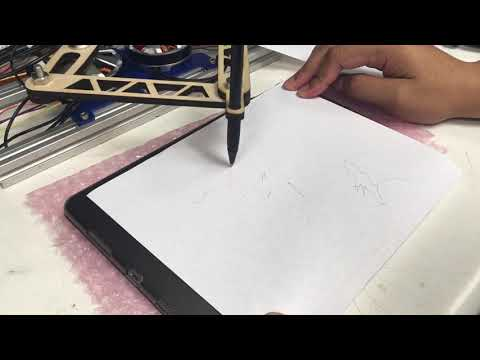

In [34]:
#youtube video import
from IPython.lib.display import YouTubeVideo

YouTubeVideo('GqgaZ-NOtgU')